In [1]:
import numpy as np 
import pandas as pd 
import os
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from utilities import *

In [2]:
datapath = '/home/koki/Desktop/Data/NLP/arxiv/archive/arxiv-metadata-oai-snapshot.json'
            #'/kaggle/input/arxiv/arxiv-metadata-oai-snapshot.json'
labelmap = {}
sample_rate = 5
abstracts_train, labels_train, labelmap = get_data_and_labels(
                    datapath=datapath,
                    year=2021, 
                    month_start=1,
                    month_end=12,
                    labelmap=labelmap,
                    update_map=True,
                    sample_rate=sample_rate
                    )

abstracts_val, labels_val, _ = get_data_and_labels(
                    datapath=datapath,
                    year=2022, 
                    month_start=1,
                    month_end=6,
                    labelmap=labelmap,
                    update_map=False,
                    sample_rate=sample_rate
                    )

abstracts_test, labels_test, _ = get_data_and_labels(
                    datapath=datapath,
                    year=2022, 
                    month_start=7,
                    month_end=12,
                    labelmap=labelmap,
                    update_map=False,
                    sample_rate=sample_rate
                    )

# processed papers 0
# processed papers 500000
# processed papers 1000000
# processed papers 1500000
# processed papers 2000000
# processed papers 0
# processed papers 500000
# processed papers 1000000
# processed papers 1500000
# processed papers 2000000
# processed papers 0
# processed papers 500000
# processed papers 1000000
# processed papers 1500000
# processed papers 2000000


### How many labels are there per paper?

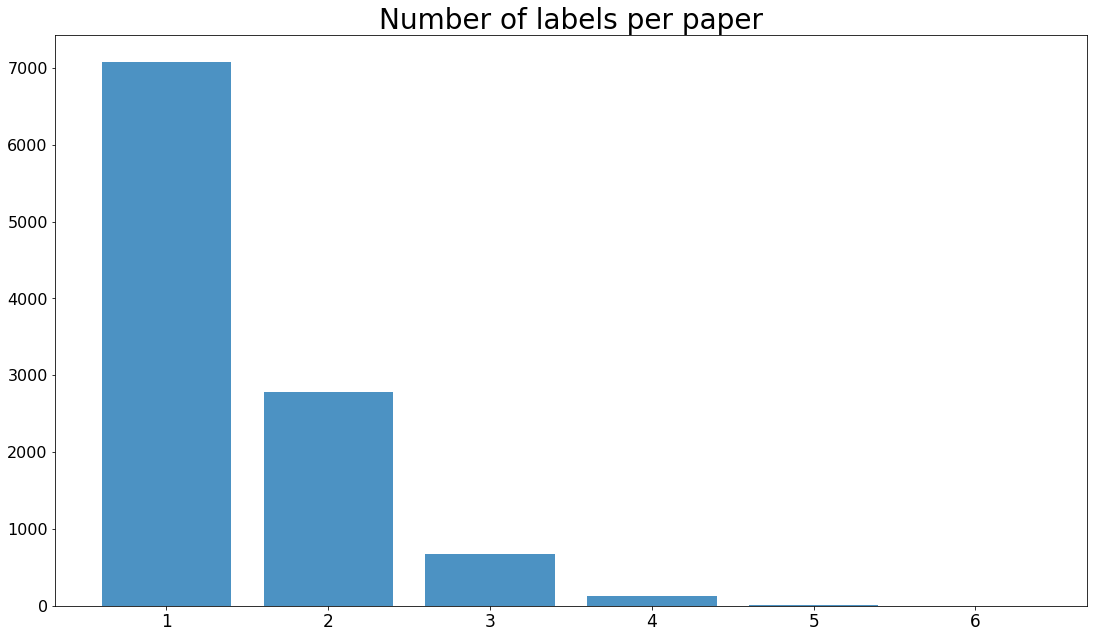

In [3]:
labels_lengths = [len(label) for label in labels_train]
d = dict(Counter(labels_lengths))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.bar(range(1, len(d)+1), [d[i] for i in range(1,len(d)+1)], alpha=0.8)
plt.xticks(rotation=0, fontsize=17)
plt.yticks(fontsize=16)
plt.title('Number of labels per paper', fontsize=28)
plt.savefig('/home/koki/Dropbox/Research/Iris/figures/nr_labels_distr.png')
plt.show()

### How are the labels distributed?

In [4]:
def plot_label_distr(labels_x, labelmap, title, suffix):
    labels = [lb for label in labels_x for lb in label]
    inverse_labelmap = {v:k for k, v in labelmap.items()}
    labeldistr = []
    for k, val in dict(Counter(labels)).items():
        labeldistr.append((val, inverse_labelmap.get(k, 'other')))
    labeldistr = sorted(labeldistr, reverse=True)
    
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    labelnames, freqs = [l[1] for l in labeldistr], [l[0]/np.count_nonzero(labels) for l in labeldistr]
    plt.bar(labelnames, freqs, alpha=0.8)
    plt.xticks(rotation=40, fontsize=17)
    plt.yticks(fontsize=16)
    plt.title(title, fontsize=28)
    plt.savefig('/home/koki/Dropbox/Research/Iris/figures/labels_distr_'+suffix+'.png')
    plt.show()
    

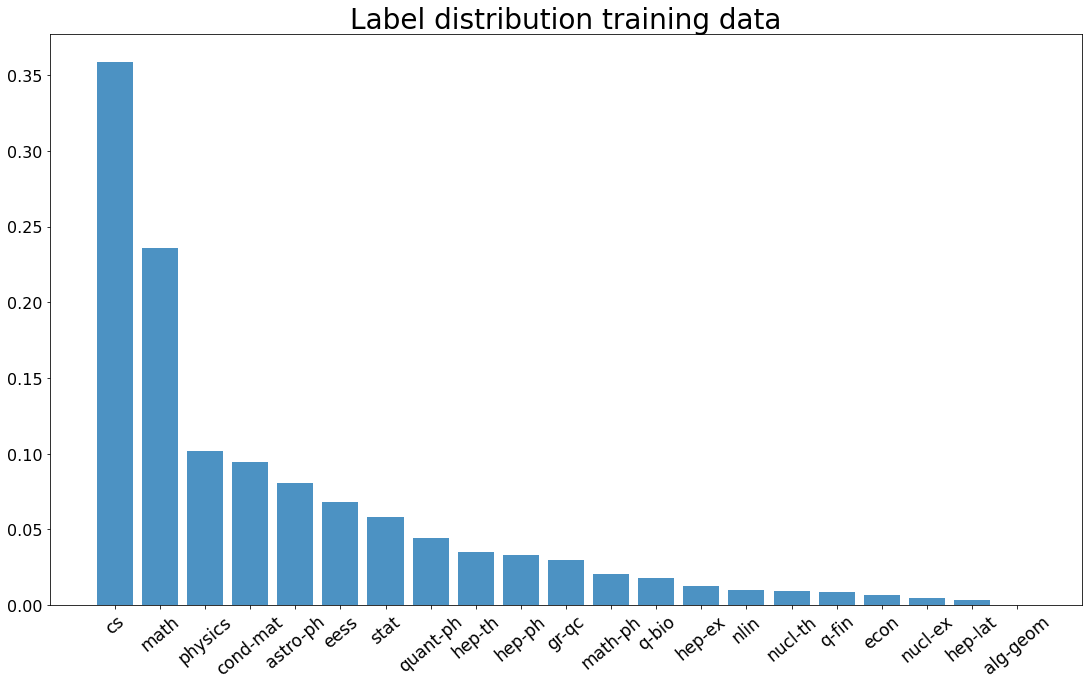

In [5]:
plot_label_distr(labels_train, labelmap, 'Label distribution training data', 'train')

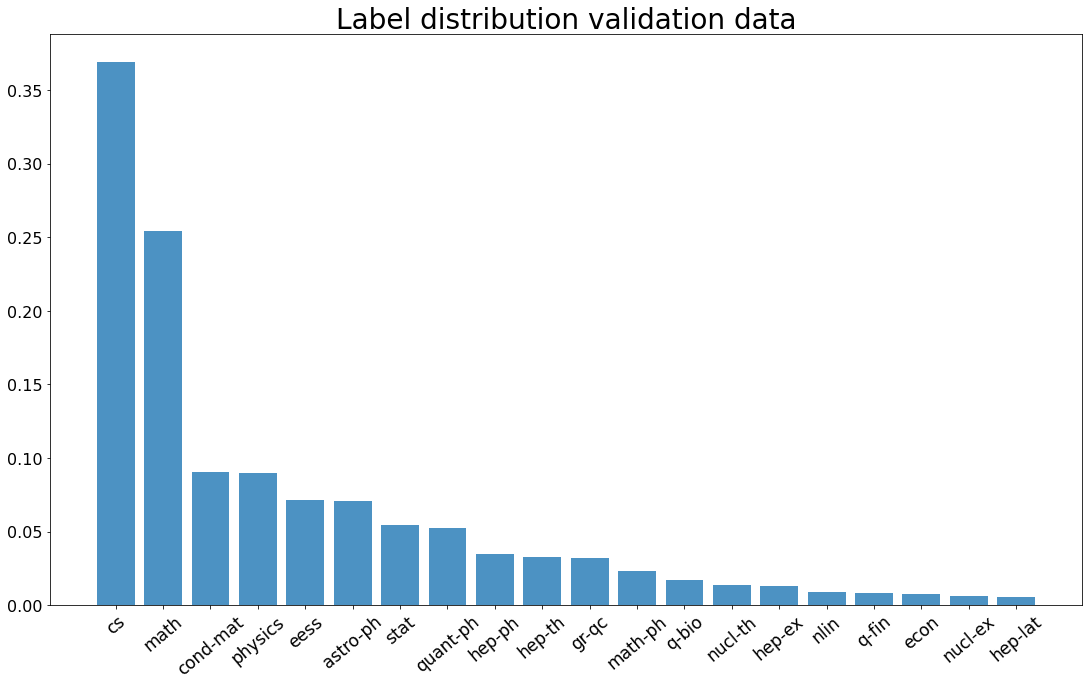

In [6]:
plot_label_distr(labels_val, labelmap, 'Label distribution validation data', 'val')

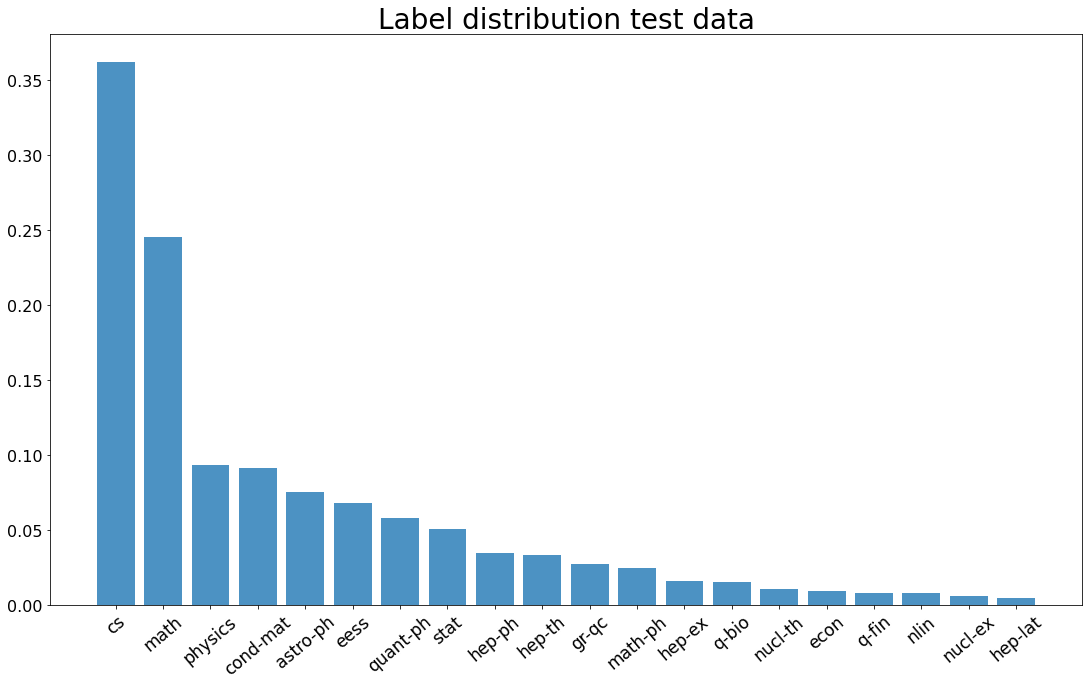

In [7]:
plot_label_distr(labels_test, labelmap, 'Label distribution test data', 'test')

### Plotting the train and validation error 
(Output copied from Kaggle notebooks.)

In [9]:
def plot_fit(history, measure, loc='upper left', suffix=''):
    fig = plt.gcf()
    fig.set_size_inches(10.5, 5.5)
    plt.plot(history[measure.lower()], marker='o', markersize=4, linestyle='--')
    plt.plot(history['val_'+measure.lower()+suffix],  marker='x', markersize=5, linestyle='--')
    plt.title('Training and validation metrics progress', fontsize=16)
    plt.ylabel(measure, fontsize=14)
    plt.xlabel('epoch',fontsize=14)
    plt.yticks(fontsize=11)
    plt.xticks(fontsize=12)
    plt.legend(['Train', 'Validation'], loc=loc,fontsize=14)
    #plt.savefig('/home/koki/Dropbox/Research/AAAI23/figures/' + name + '_' + measure + '.png')
    plt.show()


In [10]:
history_focal = {'loss': [0.15690937638282776,
  0.11478209495544434,
  0.10812919586896896,
  0.1042206883430481,
  0.10250198841094971,
  0.10144292563199997,
  0.10114714503288269,
  0.10035949945449829,
  0.09998813271522522],
 'macro_f1': [0.27155742049217224,
  0.31343913078308105,
  0.32548531889915466,
  0.33450087904930115,
  0.339760959148407,
  0.34652218222618103,
  0.34596875309944153,
  0.35110434889793396,
  0.34915950894355774],
 'auc': [0.9254052042961121,
  0.9537239074707031,
  0.9598782062530518,
  0.9632678031921387,
  0.9641321897506714,
  0.9653562903404236,
  0.965703547000885,
  0.9664149284362793,
  0.9667885899543762],
 'val_loss': [0.116456039249897,
  0.0981106385588646,
  0.09710973501205444,
  0.09264175593852997,
  0.09196267277002335,
  0.08912011981010437,
  0.08792624622583389,
  0.0878201276063919,
  0.08964214473962784],
 'val_macro_f1': [0.2156280279159546,
  0.3054640293121338,
  0.32055333256721497,
  0.34821125864982605,
  0.34118935465812683,
  0.36078378558158875,
  0.35553792119026184,
  0.34646767377853394,
  0.33223462104797363],
 'val_auc': [0.956590473651886,
  0.9696155786514282,
  0.9699986577033997,
  0.9725952744483948,
  0.9741140604019165,
  0.9766860008239746,
  0.9761240482330322,
  0.9762112498283386,
  0.9757310748100281]}

history_ce = {'loss': [0.15690937638282776,
  0.11478209495544434,
  0.10812919586896896,
  0.1042206883430481,
  0.10250198841094971,
  0.10144292563199997,
  0.10114714503288269,
  0.10035949945449829,
  0.09998813271522522],
 'macro_f1': [0.27155742049217224,
  0.31343913078308105,
  0.32548531889915466,
  0.33450087904930115,
  0.339760959148407,
  0.34652218222618103,
  0.34596875309944153,
  0.35110434889793396,
  0.34915950894355774],
 'auc': [0.9254052042961121,
  0.9537239074707031,
  0.9598782062530518,
  0.9632678031921387,
  0.9641321897506714,
  0.9653562903404236,
  0.965703547000885,
  0.9664149284362793,
  0.9667885899543762],
 'val_loss': [0.116456039249897,
  0.0981106385588646,
  0.09710973501205444,
  0.09264175593852997,
  0.09196267277002335,
  0.08912011981010437,
  0.08792624622583389,
  0.0878201276063919,
  0.08964214473962784],
 'val_macro_f1': [0.2156280279159546,
  0.3054640293121338,
  0.32055333256721497,
  0.34821125864982605,
  0.34118935465812683,
  0.36078378558158875,
  0.35553792119026184,
  0.34646767377853394,
  0.33223462104797363],
 'val_auc': [0.956590473651886,
  0.9696155786514282,
  0.9699986577033997,
  0.9725952744483948,
  0.9741140604019165,
  0.9766860008239746,
  0.9761240482330322,
  0.9762112498283386,
  0.9757310748100281]}

history_lstm_ce = {'loss': [0.174687922000885,
  0.11481039226055145,
  0.1083725094795227,
  0.10411953926086426,
  0.10330882668495178,
  0.10129350423812866,
  0.0994938537478447,
  0.09779241681098938,
  0.09540899097919464,
  0.09395025670528412,
  0.09361913800239563,
  0.09358830749988556,
  0.09210576862096786,
  0.09087713807821274,
  0.0901513323187828,
  0.09048497676849365,
  0.08912184834480286],
 'macro_f1': [0.13904426991939545,
  0.1849367916584015,
  0.21191257238388062,
  0.22647596895694733,
  0.22783628106117249,
  0.23793934285640717,
  0.2456740140914917,
  0.251476526260376,
  0.2604486346244812,
  0.2736327648162842,
  0.2695862948894501,
  0.26601430773735046,
  0.27326858043670654,
  0.27556103467941284,
  0.2796596586704254,
  0.2800953686237335,
  0.28424257040023804],
 'auc': [0.9134269952774048,
  0.9377878904342651,
  0.9398335218429565,
  0.9451483488082886,
  0.9450867772102356,
  0.9461396932601929,
  0.9456696510314941,
  0.9478914737701416,
  0.9484174847602844,
  0.9497149586677551,
  0.9502084851264954,
  0.9505573511123657,
  0.9506093859672546,
  0.9510690569877625,
  0.9520646929740906,
  0.9535938501358032,
  0.9530364871025085],
 'val_loss': [0.13979728519916534,
  0.11405231803655624,
  0.10142702609300613,
  0.09987147897481918,
  0.09646949172019958,
  0.09363269805908203,
  0.09559977799654007,
  0.09687324613332748,
  0.08812364190816879,
  0.08808674663305283,
  0.08822701126337051,
  0.08510743826627731,
  0.0830904170870781,
  0.08035267889499664,
  0.08561550825834274,
  0.08291327953338623,
  0.08199909329414368],
 'val_macro_f1': [0.12421411275863647,
  0.17853273451328278,
  0.23137825727462769,
  0.229209765791893,
  0.21118633449077606,
  0.24760538339614868,
  0.23185811936855316,
  0.23777955770492554,
  0.263281911611557,
  0.24867050349712372,
  0.2715354263782501,
  0.26512765884399414,
  0.2717403173446655,
  0.28225773572921753,
  0.27984288334846497,
  0.264926552772522,
  0.2819206416606903],
 'val_auc': [0.9477417469024658,
  0.9317550659179688,
  0.9438169002532959,
  0.9370391368865967,
  0.9410058259963989,
  0.9522281289100647,
  0.9473747611045837,
  0.9362074732780457,
  0.9456233978271484,
  0.9499629139900208,
  0.9438893795013428,
  0.953762948513031,
  0.9456668496131897,
  0.9529576301574707,
  0.9446371793746948,
  0.9532926678657532,
  0.9502325057983398]} 

history_lstm_focal = {'loss': [0.014278119429945946,
  0.008187088184058666,
  0.007631856482475996,
  0.007470092736184597,
  0.007405804470181465,
  0.0073065487667918205,
  0.007357963360846043,
  0.00739894388243556, 
  0.007248030402030284,
  0.0071590434967129,
  0.00708093011038661,
  0.0070040161567764,       ],
 'macro_f1': [0.036878619343042374,
  0.0316646471619606,
  0.037274111062288284,
  0.04027789458632469,
  0.03885788843035698,
  0.045027390122413635,
  0.04280957207083702,
  0.0473301038146019,
  0.0433521649146792,
  0.0412005889337625, 
  0.0409623649146792,
  0.0449293464932648,           ],
 'auc': [0.8774692416191101,
  0.9022270441055298,
  0.9156585931777954,
  0.9167885780334473,
  0.9174458980560303,
  0.9157751202583313,
  0.912192702293396,
  0.9266166877746582,
  0.9223608727176231,
  0.9237611279046823,
  0.92899312608745524,
  0.9343165873056549],
 'val_loss': [0.008825325407087803,
  0.008685816079378128,
  0.008550995960831642,
  0.007961723022162914,
  0.012076902531087399,
  0.007824137806892395,
  0.007986167445778847,
  0.007415587082505226,
  0.00728470294057102,
  0.00724074670557198,
  0.00708465747288346,
  0.00758407452812347,           ],
 'val_macro_f1': [0.0006612594006583095,
  0.0014374578604474664,
  0.012968744151294231,
  0.04667827486991882,
  0.031087862327694893,
  0.04482937231659889,
  0.024149619042873383,
  0.02536226063966751,
  0.0309074927594853,
  0.034498840128264,
  0.042461984635073,         
  0.042632784835722   ],
 'val_auc': [0.8571204543113708,
  0.869086503982544,
  0.8843702673912048,
  0.8778762221336365,
  0.8317373991012573,
  0.9090272188186646,
  0.8782628059387207,
  0.9250164031982422,
  0.9239140529423731,
  0.924633198742488,
  0.9180163147982901,
  0.9200016483178211]
}

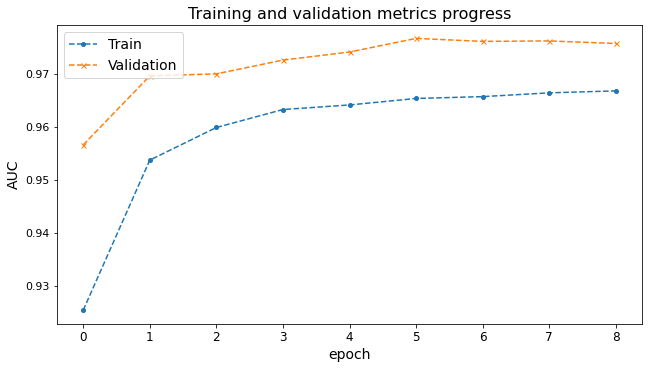

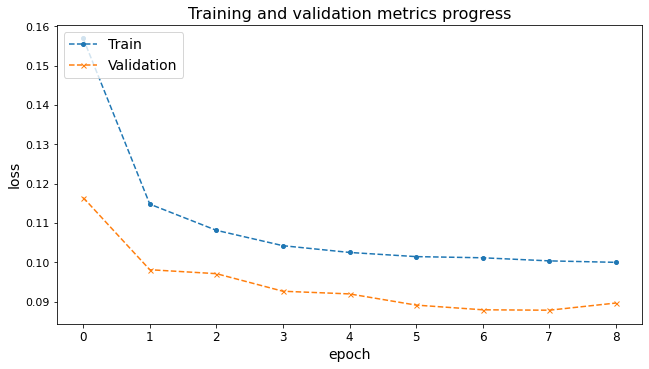

In [11]:
plot_fit(history_ce, 'AUC', suffix='')
plot_fit(history_ce, 'loss')

### Evaluation of the predictions 
Values downloaded from Kaggle notebooks

In [12]:
import numpy as np
from sklearn.metrics import roc_auc_score as auc, f1_score, recall_score, precision_score as prec

In [13]:
def read_vals(path, name):
    f = open(path+name, 'r')
    y = []
    for line in f:
        y.append([float(val) for val in line.split()])
    f.close()
    return np.array(y)

In [14]:
path = '/home/koki/Desktop/Data/NLP/Iris/'
name_preds = 'preds_focal.txt'
name_labels = 'test_labels.txt'

y_test = read_vals(path, name_labels)
y_pred = read_vals(path, name_preds)

In [15]:
np.round(auc(y_test, y_pred, average='micro'), 3), np.round(auc(y_test, y_pred, average='macro'), 3)

(0.967, 0.946)